In [3]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import imblearn
import sklearn
%matplotlib inline

# Ignore warningsfrom __future__ import print_function
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Settings
np.set_printoptions(precision=3)
pd.set_option('display.max_columns', None)

sns.set(style='darkgrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Using TensorFlow backend.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

# Load Data

In [5]:
header = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
          'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
          'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
          'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
          'num_access_files', 'num_outbound_cmds', 'is_host_login',
          'is_guest_login', 'count', 'srv_count', 'serror_rate',
          'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
          'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
          'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
          'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
          'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
          'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level']

In [15]:
data = pd.read_csv('./NSL_KDD-master/KDDTrain+_20Percent.txt', names=header)

In [16]:
print('Data has {} rows & {} columns'.format(data.shape[0],data.shape[1]))
data.head()

Data has 25192 rows & 43 columns


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


# Exploratory Analysis

In [17]:
# Descriptive Statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


In [18]:
print(data['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64


In [19]:
# since num_outbound_cmds is a redundant colums, so remove it from dataset
data.drop(['num_outbound_cmds'], axis=1, inplace=True)
data.drop(['difficulty_level'], axis=1, inplace=True)

In [20]:
# Attack class Distribution
data['attack_type'].value_counts()

normal             13449
neptune             8282
ipsweep              710
satan                691
portsweep            587
smurf                529
nmap                 301
back                 196
teardrop             188
warezclient          181
pod                   38
guess_passwd          10
warezmaster            7
buffer_overflow        6
imap                   5
rootkit                4
multihop               2
phf                    2
spy                    1
land                   1
loadmodule             1
ftp_write              1
Name: attack_type, dtype: int64

In [21]:
for i in range(len(data['attack_type'])):
      if data['attack_type'][i] != 'normal':
        data['attack_type'][i] = 'anomaly'
    
data['attack_type'].value_counts()

normal     13449
anomaly    11743
Name: attack_type, dtype: int64

In [22]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values
Y = Y.reshape(-1,1)
print([X.shape, Y.shape])
Y

[(25192, 40), (25192, 1)]


array([['normal'],
       ['normal'],
       ['anomaly'],
       ...,
       ['anomaly'],
       ['anomaly'],
       ['anomaly']], dtype=object)

# Encoding Categorical Attributes

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

X[:,1] = encoder.fit_transform(X[:,1])
X[:,2] = encoder.fit_transform(X[:,2])
X[:,3] = encoder.fit_transform(X[:,3])

Y = encoder.fit_transform(Y).reshape(-1,1)
X.shape, Y.shape
Y

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [24]:
cols = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
          'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
          'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
          'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
          'num_access_files', 'is_host_login',
          'is_guest_login', 'count', 'srv_count', 'serror_rate',
          'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
          'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
          'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
          'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
          'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
          'dst_host_srv_rerror_rate']

In [25]:
data_x = pd.DataFrame(X,columns=cols)
data_y = pd.DataFrame(Y)
data_y

,0
0,1
1,1
2,0
3,1
4,1
...,...
25187,0
25188,0
25189,0
25190,0


# Feature Selection

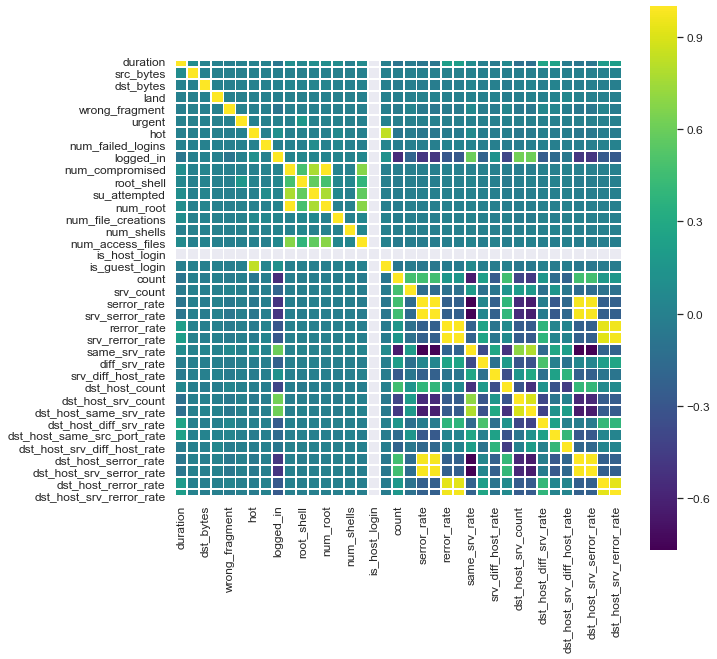

In [34]:
corr_matrix = data.corr(method='pearson')
# print(corr_matrix)
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,cmap='viridis',square=True,cbar=True,linewidths=0.9)

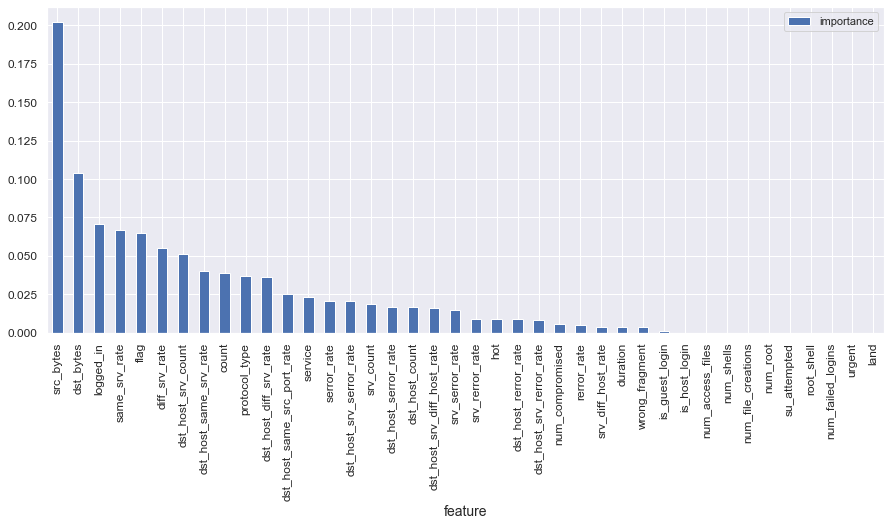

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(data_x,data_y)

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':data_x.columns, 'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (15,6)
importances.plot.bar()

In [0]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create RFE model and select 15 attributes
rfe = RFE(rfc, n_features_to_select = 15)
rfe = rfe.fit(data_x, data_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), data_x.columns)]
selected_features = [v for i, v in feature_map if i == True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate']

In [0]:
X = data_x[selected_features]
X.head()

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,1,19,9,491,0,0,2,2,1,0,25,0.17,0.03,0.17,0
1,2,41,9,146,0,0,13,1,0.08,0.15,1,0,0.6,0.88,0
2,1,46,5,0,0,0,123,6,0.05,0.07,26,0.1,0.05,0,0
3,1,22,9,232,8153,1,5,5,1,0,255,1,0,0.03,0.04
4,1,22,9,199,420,1,30,32,1,0,255,1,0,0,0


# Dataset Partition

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print([X_train.shape, X_test.shape, Y_train.shape, Y_test.shape])

[(17634, 15), (7558, 15), (17634, 1), (7558, 1)]


In [0]:
# for RNN
X_tr = X_train.to_numpy().reshape(X_train.shape[0],X_train.shape[1], 1)
X_te = X_test.to_numpy().reshape(X_test.shape[0],X_test.shape[1], 1)
X_tr.shape, X_te.shape

((17634, 15, 1), (7558, 15, 1))

# Scaling Numerical Attributes

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape

((17634, 15), (7558, 15))

# Fitting Models


In [0]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,LSTM,Input
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Using TensorFlow backend.


In [0]:
acc_score_evaluate = []
acc_score_validation = []

# ANN

In [0]:
model_ann = Sequential()
model_ann.add(Dense(60,activation='relu',input_dim=15))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(30,activation='relu'))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(1,activation='sigmoid'))
model_ann.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
model_ann.fit(X_train, Y_train,batch_size=32, epochs=25)

Epoch 1/25
17634/17634 [==============================] - 1s 61us/step - loss: 0.2501 - accuracy: 0.9059
Epoch 2/25
17634/17634 [==============================] - 1s 44us/step - loss: 0.1542 - accuracy: 0.9515
Epoch 3/25
17634/17634 [==============================] - 1s 48us/step - loss: 0.1353 - accuracy: 0.9601
Epoch 4/25
17634/17634 [==============================] - 1s 44us/step - loss: 0.1284 - accuracy: 0.9625
Epoch 5/25
17634/17634 [==============================] - 1s 46us/step - loss: 0.1135 - accuracy: 0.9667
Epoch 6/25
17634/17634 [==============================] - 1s 47us/step - loss: 0.1168 - accuracy: 0.9681
Epoch 7/25
17634/17634 [==============================] - 1s 50us/step - loss: 0.1058 - accuracy: 0.9681
Epoch 8/25
17634/17634 [==============================] - 1s 43us/step - loss: 0.1069 - accuracy: 0.9685
Epoch 9/25
17634/17634 [==============================] - 1s 44us/step - loss: 0.0974 - accuracy: 0.9699
Epoch 10/25
17634/17634 [==============================

In [0]:
score_ann_eval = model_ann.evaluate(X_train,Y_train)
print("Loss: %.3f \nAccuracy: %.3f " %(score_ann_eval[0],score_ann_eval[1]))

17634/17634 [==============================] - 0s 21us/step
Loss: 0.049 
Accuracy: 0.979 


In [0]:
score_ann_val = model_ann.evaluate(X_test,Y_test)
print("Loss: %.3f \nAccuracy: %.3f " %(score_ann_val[0],score_ann_val[1]))

7558/7558 [==============================] - 0s 19us/step
Loss: 0.052 
Accuracy: 0.978 


In [0]:
acc_score_evaluate.append(['ANN Classifier',score_ann_eval[1]])
acc_score_validation.append(['ANN Classifier',score_ann_val[1]])

In [0]:
metrics.confusion_matrix(Y_test, model_ann.predict(X_test).round())

array([[3395,  121],
       [  46, 3996]])

# Keras Classifier with pipelining

In [0]:
def create_model():
    model = Sequential()
    model.add(Dense(60,activation='relu',input_dim=15))
    model.add(Dropout(0.5))
    model.add(Dense(30,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [0]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=25, batch_size=32, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, Y_train, cv=kfold)
score_kcp = results.mean()
print("Model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model: 97.87% (0.30%)


In [0]:
acc_score_evaluate.append(['Keras Classifier', score_kcp])
acc_score_validation.append(['Keras Classifier', score_kcp])

# RNN


In [0]:
model_rnn = Sequential()
model_rnn.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape = (15,1)))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(256,activation='relu'))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(512,activation='relu'))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile('Adam','binary_crossentropy',['accuracy'])

In [0]:
model_rnn.fit(X_tr, Y_train, batch_size=32,epochs=25)

Epoch 1/25
17634/17634 [==============================] - 14s 819us/step - loss: 0.3018 - accuracy: 0.8469
Epoch 2/25
17634/17634 [==============================] - 14s 787us/step - loss: 0.2413 - accuracy: 0.8699
Epoch 3/25
17634/17634 [==============================] - 14s 795us/step - loss: 0.2265 - accuracy: 0.8748
Epoch 4/25
17634/17634 [==============================] - 14s 796us/step - loss: 0.2197 - accuracy: 0.8809
Epoch 5/25
17634/17634 [==============================] - 14s 795us/step - loss: 0.2006 - accuracy: 0.8849
Epoch 6/25
17634/17634 [==============================] - 14s 789us/step - loss: 0.1978 - accuracy: 0.8819
Epoch 7/25
17634/17634 [==============================] - 14s 777us/step - loss: 0.1864 - accuracy: 0.8898
Epoch 8/25
17634/17634 [==============================] - 13s 752us/step - loss: 0.1871 - accuracy: 0.8907
Epoch 9/25
17634/17634 [==============================] - 14s 773us/step - loss: 0.1842 - accuracy: 0.8919
Epoch 10/25
17634/17634 [============

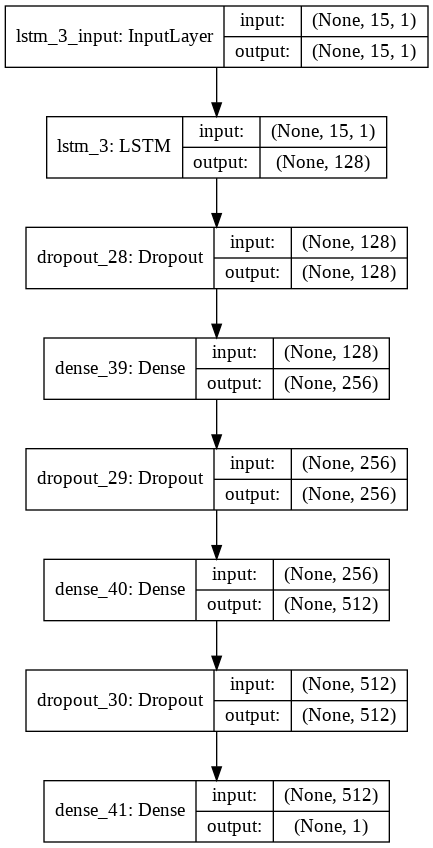

In [0]:
keras.utils.plot_model(model_rnn, to_file='rnn.png', show_shapes=True)

In [0]:
model_rnn.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_29 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)               

In [0]:
score_rnn_eval = model_rnn.evaluate(X_tr, Y_train)
print("Loss: %.3f \nAccuracy: %.3f " %(score_rnn_eval[0],score_rnn_eval[1]))

17634/17634 [==============================] - 3s 196us/step
Loss: 0.022 
Accuracy: 0.993 


In [0]:
score_rnn_val = model_rnn.evaluate(X_te, Y_test)
print("Loss: %.3f \nAccuracy: %.3f " %(score_rnn_val[0],score_rnn_val[1]))

7558/7558 [==============================] - 1s 190us/step
Loss: 0.023 
Accuracy: 0.993 


In [0]:
acc_score_evaluate.append(['RNN Classifier', score_rnn_eval[1]])
acc_score_validation.append(['RNN Classifier', score_rnn_val[1]])

In [0]:
metrics.confusion_matrix(Y_test, model_rnn.predict(X_te).round())

array([[3456,   60],
       [  20, 4022]])

# Multi-Layer Perceptron

In [0]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(100, 30, 30), solver='adam', shuffle=False, tol = 0.0001, early_stopping = True)
clf_mlp.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=False, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
mlp_score_eval = clf_mlp.score(X_train, Y_train)

print('MLP_final Score: %.3f ' % mlp_score_eval)

MLP_final Score: 0.992 


In [0]:
mlp_score_val = clf_mlp.score(X_test, Y_test)
print('MLP_final Score: %.3f ' % mlp_score_val)

MLP_final Score: 0.989 


In [0]:
acc_score_evaluate.append(['MLP Classifier', mlp_score_eval])
acc_score_validation.append(['MLP Classifier', mlp_score_val])

In [0]:
metrics.confusion_matrix(Y_test, clf_mlp.predict(X_test).round())

array([[3491,   25],
       [  58, 3984]])

# Different Classifiers

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [0]:
# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train)

# Train Gaussian Naive Bayes Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

# Train Decision Tree Model
DTC_Classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

# Train Random Forest Model
RFC_Classifier = RandomForestClassifier()
RFC_Classifier.fit(X_train, Y_train)

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train)

# Train SVM Model
svc_Classifier = SVC()
svc_Classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Evaluate Models

In [0]:
from sklearn import metrics

In [0]:
models = []
models.append(('Logistic Regression', LGR_Classifier))
models.append(('Naive Bayes Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('Random Forest Classifier', RFC_Classifier))
models.append(('KNeighbors Classifier', KNN_Classifier))
models.append(('Support Vector Classifier', svc_Classifier))
for i, v in models:
    
    scores = cross_val_score(v, X_train, Y_train, cv = 10)

    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    cm = metrics.confusion_matrix(Y_train, v.predict(X_train))
    ps = metrics.precision_score(Y_train, v.predict(X_train))
    rs = metrics.recall_score(Y_train, v.predict(X_train))
    fs = metrics.f1_score(Y_train, v.predict(X_train))
    cr = metrics.classification_report(Y_train, v.predict(X_train))
    acc_score_evaluate.append([i, accuracy])
    
    
    print()
    print('============={} Model Evaluation========='.format(i))
    print()
    print("Cross Validation Mean Score: " "\n", scores.mean())
    print()
    print("Model Accuracy: " "\n", accuracy)
    print()
    print("Confusion Matrix: " "\n", cm)
    print()
    print("Precision Score: " "\n", ps)
    print()
    print("Recall Score: " "\n", rs)
    print()
    print("F-Score: " "\n", fs)
    print()
    print("Classification Report: " "\n", cr)
    print()


=============Logistic Regression Model Evaluation=========

Cross Validation Mean Score: 
 0.9423840135411321

Model Accuracy: 
 0.9426108653737099

Confusion Matrix: 
 [[7596  631]
 [ 381 9026]]

Precision Score: 
 0.9346587967277622

Recall Score: 
 0.9594982459870309

F-Score: 
 0.9469156525388166

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      8227
           1       0.93      0.96      0.95      9407

    accuracy                           0.94     17634
   macro avg       0.94      0.94      0.94     17634
weighted avg       0.94      0.94      0.94     17634



=============Naive Bayes Classifier Model Evaluation=========

Cross Validation Mean Score: 
 0.8863001506142257

Model Accuracy: 
 0.8862424861063853

Confusion Matrix: 
 [[6874 1353]
 [ 653 8754]]

Precision Score: 
 0.8661323834965865

Recall Score: 
 0.9305836079515255

F-Score: 
 0.8972020088141848

Classification Report: 
            

In [0]:
!pip install texttable

In [0]:
from texttable import Texttable
t = Texttable()
t.add_row(['Model','Accuracy'])
t.add_rows(acc_score_evaluate,header=False)
print(t.draw())

+---------------------------+----------+
| Model                     | Accuracy |
+---------------------------+----------+
| ANN Classifier            | 0.979    |
+---------------------------+----------+
| Keras Classifier          | 0.978    |
+---------------------------+----------+
| RNN Classifier            | 0.992    |
+---------------------------+----------+
| MLP Classifier            | 0.993    |
+---------------------------+----------+
| Logistic Regression       | 0.943    |
+---------------------------+----------+
| Naive Bayes Classifier    | 0.886    |
+---------------------------+----------+
| Decision Tree Classifier  | 1        |
+---------------------------+----------+
| Random Forest Classifier  | 1        |
+---------------------------+----------+
| KNeighbors Classifier     | 0.990    |
+---------------------------+----------+
| Support Vector Classifier | 0.979    |
+---------------------------+----------+


In [0]:
!pip install tabulate
from tabulate import tabulate
print(tabulate(acc_score_evaluate,headers=['Model','Accuracy'],stralign='left',numalign='center',floatfmt=".3f"))

Model                       Accuracy
-------------------------  ----------
ANN Classifier               0.979
Keras Classifier             0.978
RNN Classifier               0.992
MLP Classifier               0.993
Logistic Regression          0.943
Naive Bayes Classifier       0.886
Decision Tree Classifier     1.000
Random Forest Classifier     1.000
KNeighbors Classifier        0.990
Support Vector Classifier    0.979


# Validating Models

In [0]:
for i, v in models:
    scores = cross_val_score(v, X_test, Y_test, cv = 10)
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    cm = metrics.confusion_matrix(Y_test, v.predict(X_test))
    ps = metrics.precision_score(Y_test, v.predict(X_test))
    rs = metrics.recall_score(Y_test, v.predict(X_test))
    fs = metrics.f1_score(Y_test, v.predict(X_test))
    cr = metrics.classification_report(Y_test, v.predict(X_test))
    acc_score_validation.append([i,accuracy])
    print()
    print('============={} Model Evaluation========='.format(i))
    print()
    print("Cross Validation Mean Score: " "\n", scores.mean())
    print()
    print("Model Accuracy: " "\n", accuracy)
    print()
    print("Confusion Matrix: " "\n", cm)
    print()
    print("Precision Score: " "\n", ps)
    print()
    print("Recall Score: " "\n", rs)
    print()
    print("F-Score: " "\n", fs)
    print()
    print("Classification Report: " "\n", cr)


=============Logistic Regression Model Evaluation=========

Cross Validation Mean Score: 
 0.94403272714531

Model Accuracy: 
 0.9454882243979889

Confusion Matrix: 
 [[3271  245]
 [ 167 3875]]

Precision Score: 
 0.9405339805825242

Recall Score: 
 0.958683819891143

F-Score: 
 0.9495221759372703

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      3516
           1       0.94      0.96      0.95      4042

    accuracy                           0.95      7558
   macro avg       0.95      0.94      0.95      7558
weighted avg       0.95      0.95      0.95      7558


=============Naive Bayes Classifier Model Evaluation=========

Cross Validation Mean Score: 
 0.8954723361014754

Model Accuracy: 
 0.8949457528446679

Confusion Matrix: 
 [[2988  528]
 [ 266 3776]]

Precision Score: 
 0.8773234200743495

Recall Score: 
 0.9341909945571499

F-Score: 
 0.9048646057991853

Classification Report: 
               p

In [0]:
from texttable import Texttable
t = Texttable()
t.add_row(['Model','Accuracy'])
t.add_rows(acc_score_validation,header=False)
print(t.draw())

+---------------------------+----------+
| Model                     | Accuracy |
+---------------------------+----------+
| ANN Classifier            | 0.978    |
+---------------------------+----------+
| Keras Classifier          | 0.978    |
+---------------------------+----------+
| RNN Classifier            | 0.992    |
+---------------------------+----------+
| MLP Classifier            | 0.990    |
+---------------------------+----------+
| Logistic Regression       | 0.945    |
+---------------------------+----------+
| Naive Bayes Classifier    | 0.895    |
+---------------------------+----------+
| Decision Tree Classifier  | 0.994    |
+---------------------------+----------+
| Random Forest Classifier  | 0.998    |
+---------------------------+----------+
| KNeighbors Classifier     | 0.986    |
+---------------------------+----------+
| Support Vector Classifier | 0.978    |
+---------------------------+----------+


In [0]:
print(tabulate(acc_score_validation,headers=['Model','Accuracy'],stralign='left',numalign='center',floatfmt=".3f"))

Model                       Accuracy
-------------------------  ----------
ANN Classifier               0.978
Keras Classifier             0.978
RNN Classifier               0.992
MLP Classifier               0.990
Logistic Regression          0.945
Naive Bayes Classifier       0.895
Decision Tree Classifier     0.994
Random Forest Classifier     0.998
KNeighbors Classifier        0.986
Support Vector Classifier    0.978


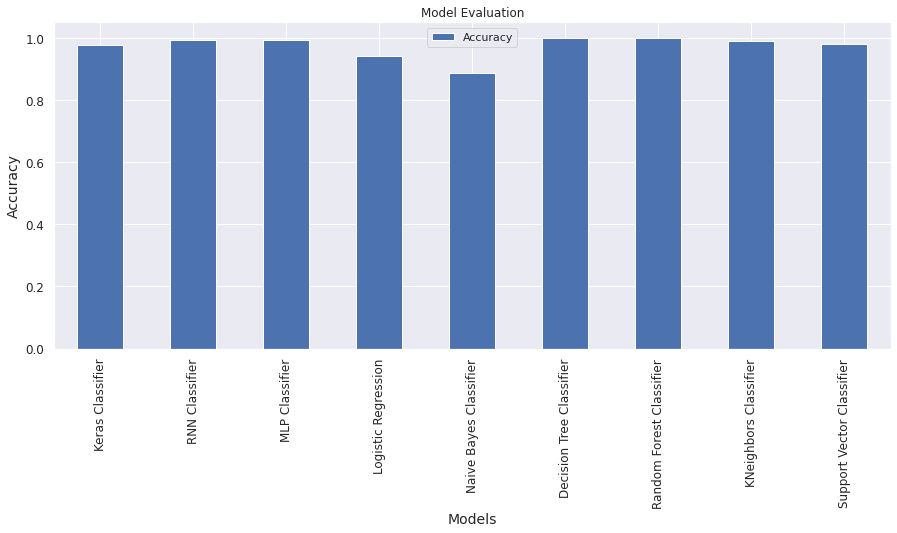

In [0]:
df = pd.DataFrame(acc_score_evaluate[1:],columns=['Model','Accuracy'])
df_eval = df.set_index('Model')
ax = df_eval.plot(kind='bar', title='Model Evaluation', figsize=(15,6), legend=True, fontsize=12)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.show()

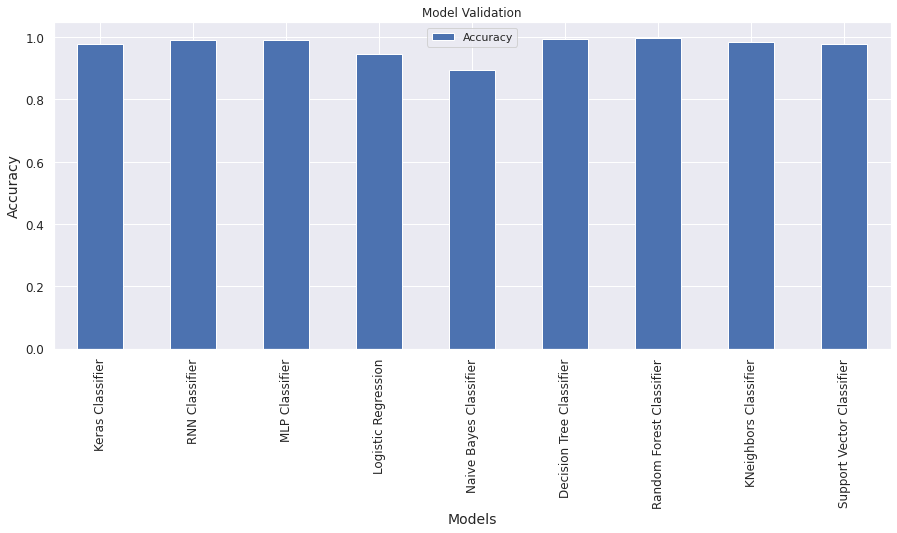

In [0]:
df_val = pd.DataFrame(acc_score_validation[1:],columns=['Model','Accuracy'],index=df['Model'])
ax = df_val.plot(kind='bar', title='Model Validation', figsize=(15,6), legend=True, fontsize=12)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.show()